## Importing all necessary libraries

In [1]:
# Basic analysis library

import sys
import numpy as np
import pandas as pd

In [2]:
# Visualization libraries

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from IPython.display import display
%matplotlib inline

In [3]:
# Ignoring warnings

import warnings
warnings.filterwarnings('ignore')

## Data Collection

In [4]:
# Loading dataset

df=pd.read_csv("diabetes.csv")

In [5]:
# Getting 10 random samples

df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
671,1,99,58,10,0,25.4,0.551,21,0
324,2,112,75,32,0,35.7,0.148,21,0
412,1,143,84,23,310,42.4,1.076,22,0
527,3,116,74,15,105,26.3,0.107,24,0
349,5,0,80,32,0,41.0,0.346,37,1
641,4,128,70,0,0,34.3,0.303,24,0
24,11,143,94,33,146,36.6,0.254,51,1
152,9,156,86,28,155,34.3,1.189,42,1
453,2,119,0,0,0,19.6,0.832,72,0
2,8,183,64,0,0,23.3,0.672,32,1


## Data Preprocessing

In [6]:

# Displaying the number of entries, the names of the column attributes, the data type and the memory space used

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The dataset contains 768 rows of records and 9 columns of attributes. The data types of the attributes consist of 1 quantitative discrete binary, 6 quantitative discrete numerical integers and 2 quantitative continuous numerical float with 64 digit placings.

In [7]:
# Summary statistics of the attributes, including measures of central tendency and measures of dispersion

df.describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


'Pregnancies' is the number of pregnancies to date, with a realistic range of 0 to 17.

'Glucose' is the plasma glucose concentration over 2 hours in an oral glucose tolerance test, measured in milligrams per decilitre (mg/dL). A blood sugar level less than 140 mg/dL is normal. A reading of more than 200 mg/dL indicates diabetes, whereas that between 140 and 199 mg/dL (indicates prediabetes. The data ranges from 0 to 199, which indicates that the impossible value of 0 should be smoothed.

'BloodPressure' is the diastolic blood pressure, measured in millimeters of mercury (mm Hg). A normal blood pressure would have a reading of less than 80 mmHg, and this may vary from 90 to 120 mmHg for a healthy young person. A reading of more than 140 mmHg indicates high blood pressure. The data ranges from 0 to 122, which indicates that the impossible value of 0 should be smoothed.

'SkinThickness' is the triceps skin fold thickness, measured in millimeters (mm). The data ranges from 0 to 99, which indicates that the impossible value of 0 should be smoothed.

'Insulin' is the 2-hour serum insulin, measured in micrometre units per millilitre (mu U/ml). The data ranges from 0 to 846, which indicates that the impossible value of 0 should be smoothed.

'BMI' is the body mass index (BMI) for weight in kg and height in m (kg/m^2). The data ranges from 0 to 67, which indicates that the impossible value of 0 should be smoothed. BMI should not be close to zero unless the person is grossly underweight which could be life-threatening.

'DiabetesPedigreeFunction' is a function that scores likelihood of diabetes based on family history, with a realistic range of 0.08 to 2.42.

'Age' in years has a realistic range of 21 to 81.

'Outcome' is the target class label, where 0 represents absence and 1 represents presence of diabetes.

In [8]:
# Checking for null values 

df.isnull().sum().any()

False



There are no null values in our data.

Duplicated rows or records will not be dropped from the dataset in this case. There is no certain redundancy which causes inaccurate results and outcomes, since the dataset has no unique identfier that denotes separate entities. Despite this, the dataset will still be checked for duplicated rows.

In [9]:
# Checking for duplicate rows

duplicated_rows = df[df.duplicated()]
duplicated_rows.shape

(0, 9)

There are no duplications in the dataset.

## Exploratory Data Analysis

EDA aims to perform initial investigations on data before formal modeling and graphical representations and visualisations, in order to discover patterns, look over assumptions, and test hypothesis. The summarised information on main characteristics and hidden trends in data can help the doctor to identify concern areas and problems and the resolution of these can boost their accuracy in diagosing diabetes.

Let us take a closer look at the target class labels as well as their frequency of occurences.

In [10]:
# Checking the outcome labels

df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

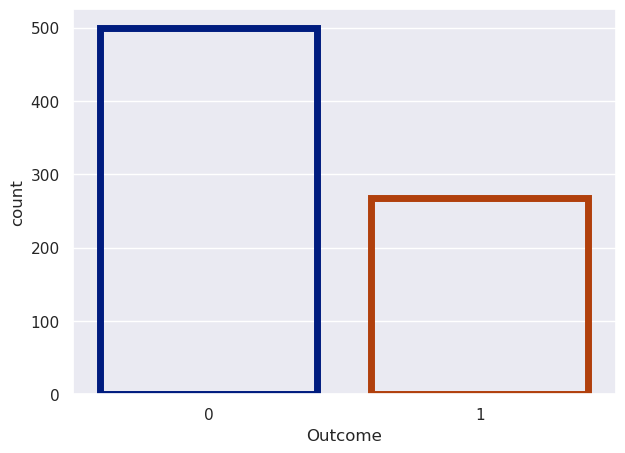

In [11]:
# Plotting the outcome col. histogram

plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Outcome',palette="autumn",facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3))
plt.show()

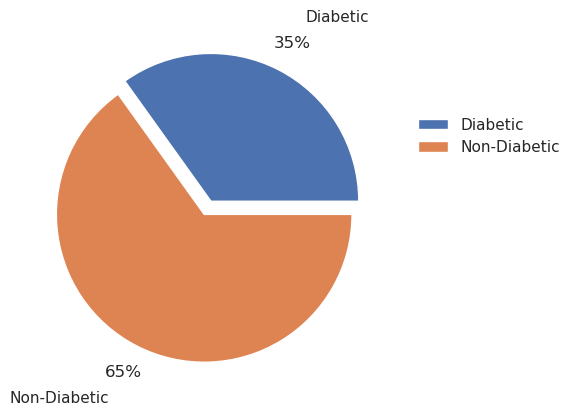

In [12]:
fig, ax = plt.subplots()

labels = ['Diabetic', 
         'Non-Diabetic']
percentages = [34.89, 65.10]
explode=(0.1,0)
ax.pie(percentages, explode=explode, labels=labels, autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

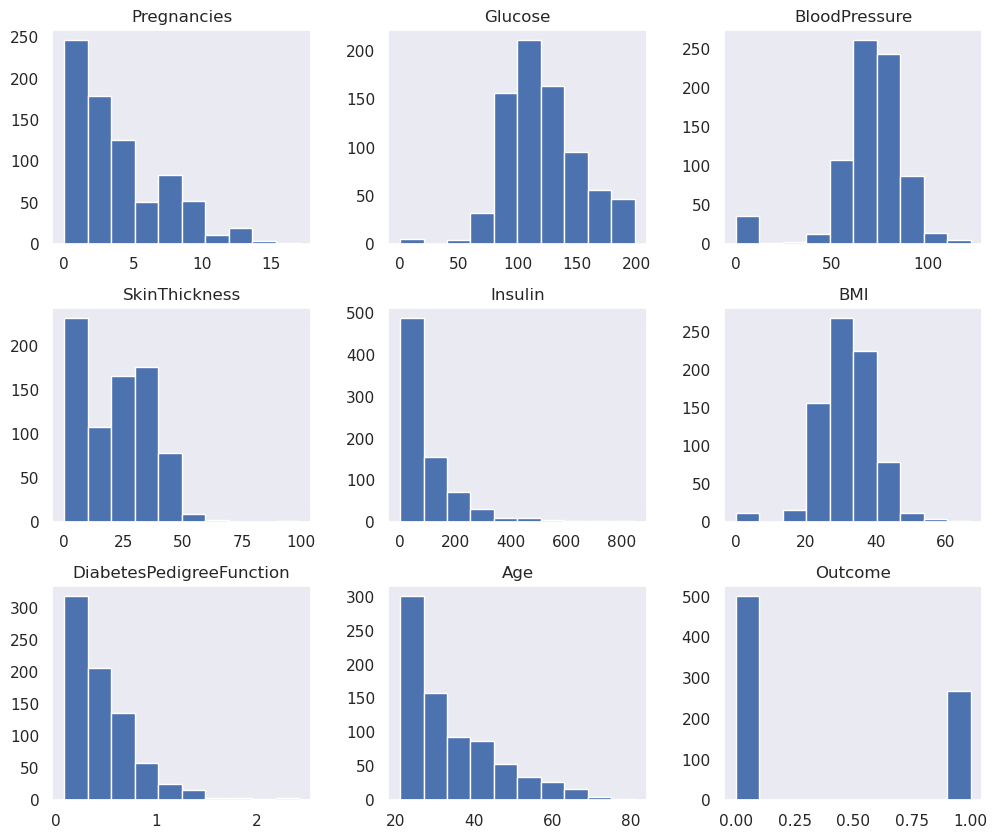

In [13]:
# Checking distribution of all features

df.hist(figsize=(12,10),grid=False)
sns.set_style('white')
plt.show()

The Histograms provide us a more or less clear picture that the Attributes are positively skewed.

Furthermore, the histogram density plots and their respective highest point in the curves show the patterns that diabetes patients generally have higher numbers of Pregnancies, higher Glucose and BMI readings, and older in Age.

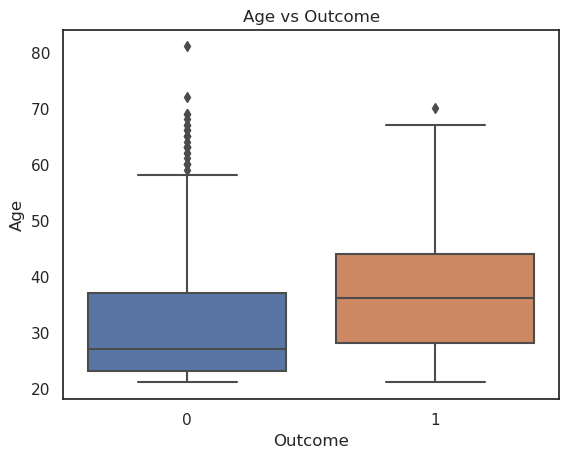

In [14]:
#First, we would know what is the effect of Age on the Outcome because we have heard that as the age increases, the chances of diabetes also commonly increases.

sns.boxplot(x = 'Outcome', y = 'Age', data = df)
plt.title('Age vs Outcome')
plt.show()

Yes, we were right, the median of the age of diabetic people is greater than that of non-diabetic people.

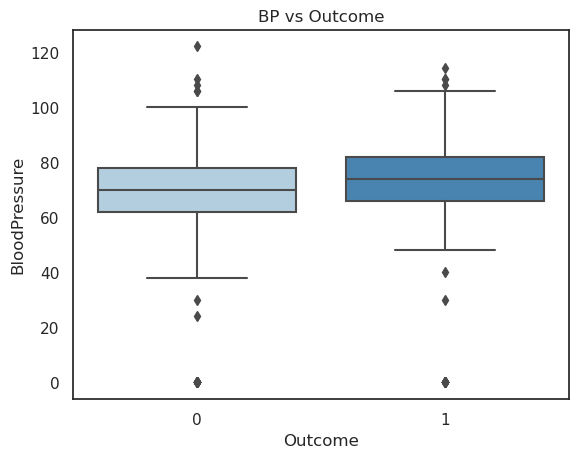

In [15]:
#Let's also check the effect of Blood Pressure on the Outcome.

sns.boxplot(x = 'Outcome', y = 'BloodPressure', data = df, palette = 'Blues')
plt.title('BP vs Outcome')
plt.show()

The median of the BloodPressure of diabetic people lies close to the 75th Percentile of non-diabetic people.

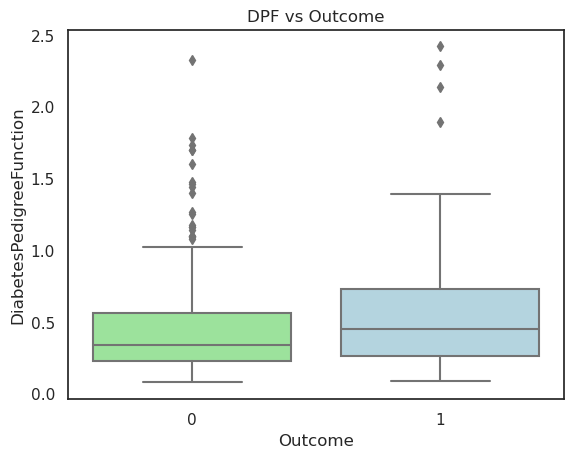

In [16]:
#One would also want to know the chances of getting diabetes, if it is common in the family. We can check that with the Diabetes Pedigree Functio

my_pal = {0: "lightgreen", 1: "lightblue"}
sns.boxplot(x = 'Outcome', y = 'DiabetesPedigreeFunction', data = df, palette = my_pal)
plt.title('DPF vs Outcome')
plt.show()

Quite a proportion of people having high DPF does not end up having Diabetes. But usually the diabetic people have DPF value close to 0.5 (50th Percentile)

### Gluscose Level

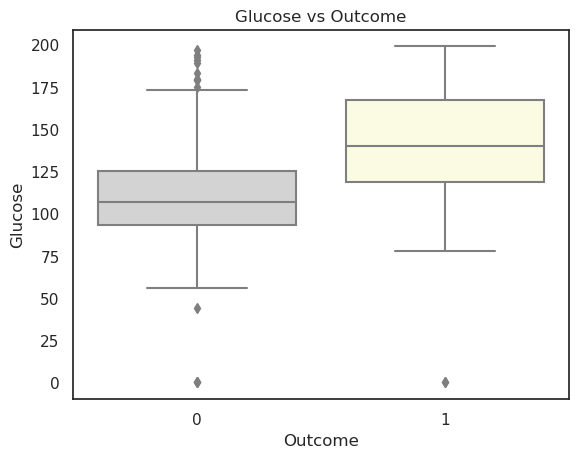

In [17]:
my_pal = {0: "lightgrey", 1: "lightyellow"}
sns.boxplot(x = 'Outcome', y = 'Glucose', data = df, palette = my_pal)
plt.title('Glucose vs Outcome')
plt.show()

Wow! the median of the Glucose level of Diabetic People is greater than the 75th Percentile of the glucose level of non-diabetic people. Therefore having a high glucose level does increase the chances of having diabetes.

### Body Mass Index

Body mass index (BMI) is a measure of body fat based on height and weight that applies to adult men and women. Does having a higher BMI leads to more chances of being diabetic? Let's check that out!

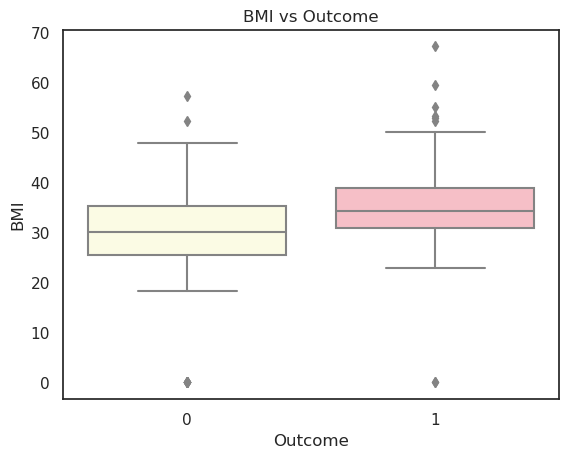

In [18]:
my_pal = {0: "lightyellow", 1: "lightpink"}
sns.boxplot(x = 'Outcome', y = 'BMI', data = df, palette = my_pal)
plt.title('BMI vs Outcome')
plt.show()

Indeed, the Median BMI of the Diabetic People is greater than the Median BMI of the Non-Diabetic people.

<AxesSubplot: >

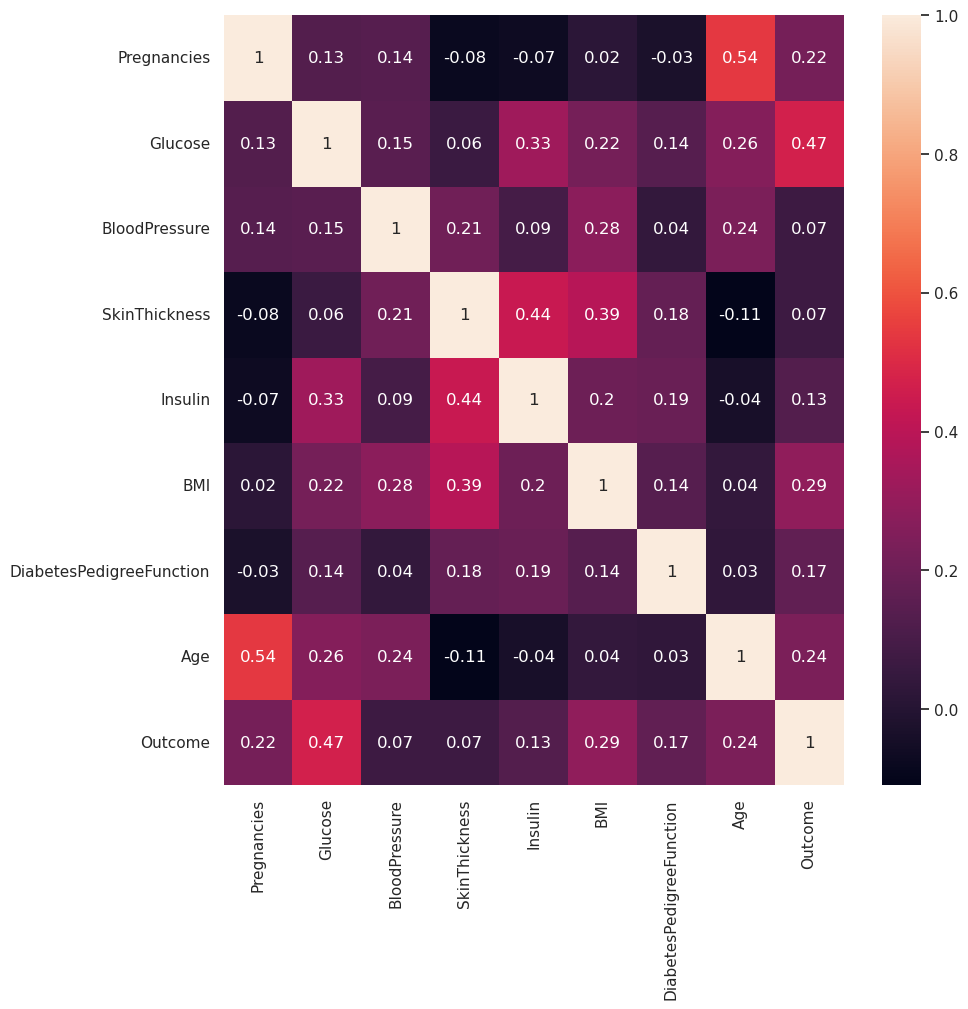

In [19]:
# Correlation matrix of the data

figure = plt.figure(figsize = (10, 10))
corr_matrix = df.corr().round(2)
sns.heatmap(data = corr_matrix, annot = True)

# The less correlation, the better. More correlation means presence of duplication of features

Almost all predictors have weak linear correlations, which is indicative that most of them are more likely to have non-linear relationships.

However it is found that, the correlation between Pregnancies & Age is 54%, the correlation between SkinThickness & BMI is 39%, and the correlation between Insulin & SkinThickness is 44%.

So, the population is advised to be concerned about the above issues in order to minimise the chances of diabetes.

Further the analysis is mostly focused on the relationship between various diabetes features and the target feature which is diabetes outcome. This is because the classification purpose will be mostly interested in these types of correlation and their strengths in order for accurate predictions.

### Building and Deploying Model

In [20]:
import sagemaker
import boto3
from sagemaker.amazon.amazon_estimator import get_image_uri 
from sagemaker.session import s3_input, Session

In [25]:
bucket_name = 'diabetesworkshop1928' # <--- CHANGE THIS VARIABLE TO A UNIQUE NAME FOR YOUR BUCKET
my_region = boto3.session.Session().region_name # set the region of the instance
print(my_region)

us-east-1


In [26]:
s3 = boto3.resource('s3')
try:
    if  my_region == 'us-east-1':
        s3.create_bucket(Bucket=bucket_name)
    print('S3 bucket created successfully')
except Exception as e:
    print('S3 error: ',e)

S3 bucket created successfully


In [27]:
# set an output path where the trained model will be saved
prefix = 'xgboost-as-a-built-in-algo'
output_path ='s3://{}/{}/output'.format(bucket_name, prefix)
print(output_path)

s3://diabetesworkshop1928/xgboost-as-a-built-in-algo/output


In [28]:
### Train Test split

train_data, test_data = np.split(df.sample(frac=1, random_state=1729), [int(0.7 * len(df))])
print(train_data.shape, test_data.shape)
     

(537, 9) (231, 9)


In [29]:
### Saving Train And Test Into Buckets
## We start with Train Data
import os
pd.concat([train_data['Outcome'], train_data.drop(['Outcome'], 
                                                axis=1)], 
                                                axis=1).to_csv('train.csv', index=False, header=False)
boto3.Session().resource('s3').Bucket(bucket_name).Object(os.path.join(prefix, 'train/train.csv')).upload_file('train.csv')
s3_input_train = sagemaker.TrainingInput(s3_data='s3://{}/{}/train'.format(bucket_name, prefix), content_type='csv')

In [30]:
# Test Data Into Buckets
pd.concat([test_data['Outcome'], test_data.drop(['Outcome'], axis=1)], axis=1).to_csv('test.csv', index=False, header=False)
boto3.Session().resource('s3').Bucket(bucket_name).Object(os.path.join(prefix, 'test/test.csv')).upload_file('test.csv')
s3_input_test = sagemaker.TrainingInput(s3_data='s3://{}/{}/test'.format(bucket_name, prefix), content_type='csv')

### Building Models Xgboot- Inbuilt Algorithm

In [31]:
# this line automatically looks for the XGBoost image URI and builds an XGBoost container.
# specify the repo_version depending on your preference.
container = get_image_uri(boto3.Session().region_name,
                          'xgboost', 
                          repo_version='1.0-1')

The method get_image_uri has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [32]:
# initialize hyperparameters
hyperparameters = {
        "max_depth":"5",
        "eta":"0.2",
        "gamma":"4",
        "min_child_weight":"6",
        "subsample":"0.7",
        "objective":"binary:logistic",
        "num_round":50
        }

In [ ]:
# construct a SageMaker estimator that calls the xgboost-container
estimator = sagemaker.estimator.Estimator(image_uri=container, 
                                          hyperparameters=hyperparameters,
                                          role=sagemaker.get_execution_role(),
                                          train_instance_count=1, 
                                          train_instance_type='ml.m5.2xlarge', 
                                          train_volume_size=5, # 5 GB 
                                          output_path=output_path,
                                          train_use_spot_instances=True,
                                          train_max_run=300,
                                          train_max_wait=600)

In [ ]:
estimator.fit({'train': s3_input_train,'validation': s3_input_test})

### Deploy Machine Learning Model As Endpoints

In [ ]:
xgb_predictor = estimator.deploy(initial_instance_count=1,instance_type='ml.m4.xlarge')

### Prediction of the Test Data

In [ ]:
from sagemaker.predictor import csv_serializer
test_data_array = test_data.drop(['Outcome'], axis=1).values #load the data into an array
xgb_predictor.serializer = csv_serializer # set the serializer type
predictions = xgb_predictor.predict(test_data_array).decode('utf-8') # predict!
predictions_array = np.fromstring(predictions[1:], sep=',') # and turn the prediction into an array
print(predictions_array.shape)

In [ ]:
predictions_array

In [ ]:
cm = pd.crosstab(index=test_data['Outcome'], columns=np.round(predictions_array), rownames=['Observed'], colnames=['Predicted'])
tn = cm.iloc[0,0]; fn = cm.iloc[1,0]; tp = cm.iloc[1,1]; fp = cm.iloc[0,1]; p = (tp+tn)/(tp+tn+fp+fn)*100
print("\n{0:<20}{1:<4.1f}%\n".format("Overall Classification Rate: ", p))
print("{0:<15}{1:<15}{2:>8}".format("Predicted", "No Purchase", "Purchase"))
print("Observed")
print("{0:<15}{1:<2.0f}% ({2:<}){3:>6.0f}% ({4:<})".format("No Purchase", tn/(tn+fn)*100,tn, fp/(tp+fp)*100, fp))
print("{0:<16}{1:<1.0f}% ({2:<}){3:>7.0f}% ({4:<}) \n".format("Purchase", fn/(tn+fn)*100,fn, tp/(tp+fp)*100, tp))